![bf.jpg](image\bf.jpg)

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers againstdifferent products



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
X_train = train.drop(columns=['Purchase'])
y_train = train['Purchase']
df = pd.concat([X_train, test])
df.shape

(783667, 11)

In [3]:
X_train.shape

(550068, 11)

In [4]:
submit = pd.read_csv("sample_submission_V9Inaty.csv")

In [5]:
submit['User_ID'] = test['User_ID']
submit['Product_ID'] = test['Product_ID']

In [6]:
train.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


In [6]:
train.shape, test.shape

((550068, 12), (233599, 11))

# Exploratory analysis

In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


### Age

<AxesSubplot:title={'center':'Gender'}, ylabel='Gender'>

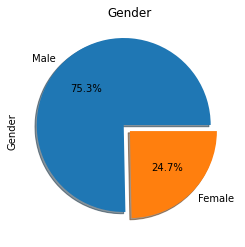

In [9]:
train["Gender"].value_counts().plot.pie(title="Gender", explode=(0.1, 0), labels=["Male", "Female"], autopct="%1.1f%%", shadow=True)

<b>The main customers for black friday sale are male about 75 percent.</b>

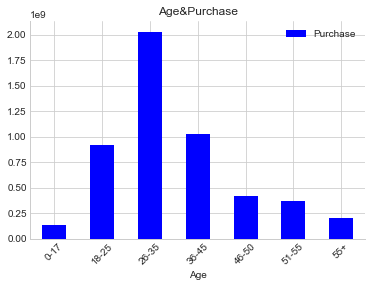

In [100]:
train.groupby(["Age"]).sum()[["Purchase"]].plot.bar(title="Age&Purchase", color='b')
plt.xticks(rotation=45)
sns.despine()

<b>The people of age 26-35, who account for almost one third of male customers of all ages. And most of the buyers are between the age of 18-45.</b>

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


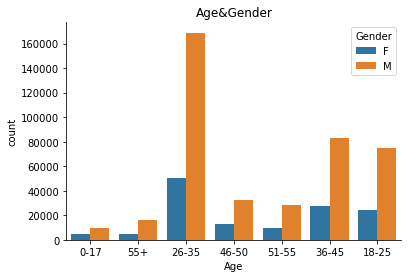

In [10]:
sns.countplot(train["Age"], hue=train["Gender"]).set_title("Age&Gender")
sns.despine()

C:\Users\pc\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


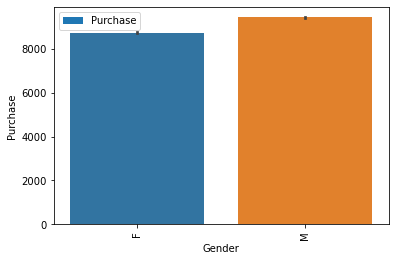

In [11]:
train[['Gender','Purchase']].groupby('Gender').mean().plot.bar()
sns.barplot('Gender', 'Purchase', data = train)
plt.show()

<b>It looks like that men tend to spend more on Black Friday although women are not far behind.</b>

## City

<AxesSubplot:title={'center':'City_Category'}, ylabel='City_Category'>

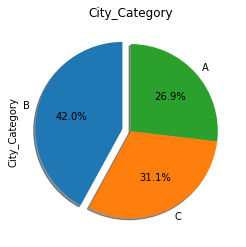

In [10]:
train["City_Category"].value_counts().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), autopct="%1.1f%%", 
                                               shadow=True)

<b>Customers from B category cities make up more sales than the other category cities of our black friday.</b>

<AxesSubplot:title={'center':'City_Category'}, ylabel='Purchase'>

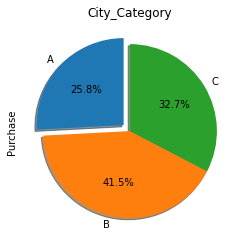

In [13]:
train.groupby("City_Category")["Purchase"].sum().plot.pie(title="City_Category", startangle=90, explode=(0.1, 0, 0), 
                                                          autopct="%1.1f%%", shadow=True)

<b>The people belonging to category B tend to spend a little more. These may be the more developed cities that we are talking about here.</b>

# Occupation

<AxesSubplot:title={'center':'Occupation'}>

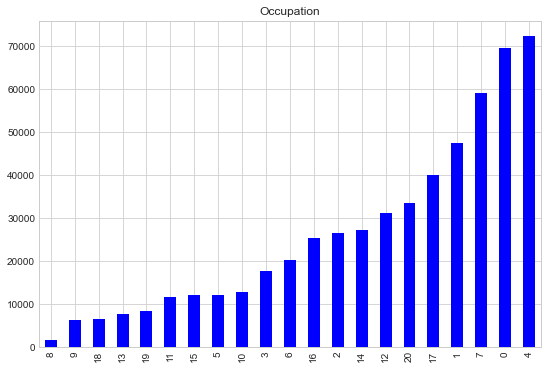

In [98]:
train["Occupation"].value_counts().sort_values().plot.bar(title="Occupation", color="b", figsize=(9, 6))

<AxesSubplot:title={'center':'Mean purchase of different occupation'}, xlabel='Occupation'>

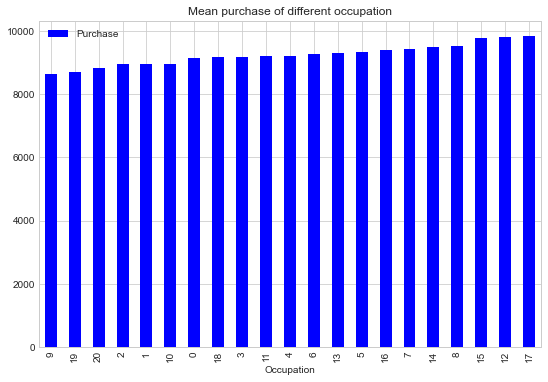

In [101]:
train.groupby(["Occupation"]).mean()[["Purchase"]].sort_values(by="Purchase").plot.bar(title="Mean purchase of different occupation", color='b', figsize=(9, 6))

From occupation figure only we see that our customers have a wide range of occupations. Overall, the bars show a steep cliff. Ocupation 4, 0, 7, 1, 17, 1 are the most common ones and they exceed other occupations by a great margin, which means people having this six occupations should definately be our main marketing target. The second figure above shows something very different. There is a cluster in how much they spent, most people spent around 600K to 800K in our store. People with occupation 18, 19 typically spent more than others in our store on Black Friday, although none of them were in the common occupations for our customers. As a matter of fact, occupation 18 and 19 were next to the least common occupation for our customers. Therefore we should make different marketing stratgies for our biggest target and biggest spender.



<AxesSubplot:>

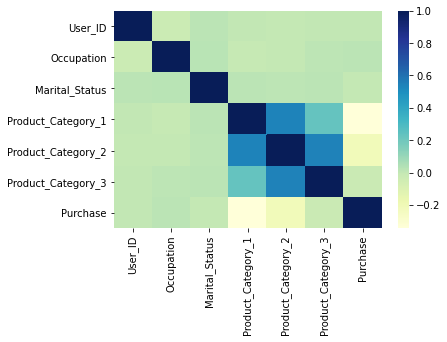

In [15]:
sns.heatmap(data=train.corr(), cmap="YlGnBu") 

It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

1. Product_Category_1 has a negative correlation with Purchase.
2. Maritial_Status and Age are strongly correlated. As Expected.
3. Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

### Data preprocessing

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


* It can be seen that we have 550,068 rows in our data and most of the Data Columns are non-null except for 'Purchase_Category_2' and 'Purchase_Category_3'. We need to handle the missing data in these columns.

In [24]:
train.isnull().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [25]:
# find the percentage of missing data within those variables
train.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.315666
Product_Category_3            0.696727
Purchase                      0.000000
dtype: float64

In [26]:
test.isnull().mean()

User_ID                       0.000000
Product_ID                    0.000000
Gender                        0.000000
Age                           0.000000
Occupation                    0.000000
City_Category                 0.000000
Stay_In_Current_City_Years    0.000000
Marital_Status                0.000000
Product_Category_1            0.000000
Product_Category_2            0.309693
Product_Category_3            0.695902
dtype: float64

In [27]:
# fill nan with 0, meaning that they bought 0 item of those categories
df = df.fillna(0)

In [28]:
df.isnull().mean()

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Product_Category_3            0.0
dtype: float64

So, we do not have any 'Other' gender type. I will create a function and map M=1 and F=0. No sexism intended.

In [29]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [30]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
df['Gender'] = df['Gender'].apply(map_gender)

- Age

In [31]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

###### So, we are having bins. Lets make these bins into numeric values

In [32]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
df['Age'] = df['Age'].apply(map_age)

- City_Category

In [33]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [34]:
def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
df['City_Category'] = df['City_Category'].apply(map_city_categories)

- Stay_In_Current_City_Years

In [35]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [36]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [37]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(map_stay)

In [38]:
# drop User_ID and Product_ID parameters
df.drop(['User_ID','Product_ID'], inplace = True, axis =1)

In [39]:
df.head(5)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10,2,2,0,3,0.0,0.0
1,0,0,10,2,2,0,1,6.0,14.0
2,0,0,10,2,2,0,12,0.0,0.0
3,0,0,10,2,2,0,12,14.0,0.0
4,1,6,16,0,4,0,8,0.0,0.0


In [40]:
df.shape, train.shape, test.shape

((783667, 9), (550068, 12), (233599, 11))

In [41]:
X_train = df.iloc[0:550068,:]
#X_train = pd.concat([X_train, y_train], axis=1)
X_test = df.iloc[550068:783667,:]

In [42]:
X_train.shape, X_test.shape

((550068, 9), (233599, 9))

# Data Modelling

#### Creating a train test split from the train dataset

In [43]:
from sklearn.model_selection import train_test_split
df_train, df_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [44]:
df_train.shape, df_test.shape

((440054, 9), (110014, 9))

In [45]:
Y_train.shape

(440054,)

#### Simple linear regression

In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(df_train, Y_train)

LinearRegression()

In [61]:
y_pred = lm.predict(df_test)

In [62]:
y_pred

array([13261.49185762, 12371.88047689,  7212.52805281, ...,
        7600.31088995,  8993.73149695,  8607.98866682])

In [63]:
Y_test.array

<PandasArray>
[19142, 15513,  7802, 15455,  4492,  6965,  8763, 19347,  7017, 15594,
 ...
  6901,  7882,  8659, 15611,  5893, 19139,  7856,  4037,  7467,  8002]
Length: 110014, dtype: int64

In [64]:
RMSE_lr = sqrt(mean_squared_error(Y_test, y_pred))
RMSE_lr

4618.695144021098

In [65]:
# linear regression for entire data
lm.fit(X_train, y_train)
submit['Purchase'] = lm.predict(X_test)

In [66]:
submit.to_csv('lr_Black_friday_sales_prediction.csv',index = False)

### Decision Tree Regression

In [67]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()

In [68]:
dec_tree.fit(df_train, Y_train)

DecisionTreeRegressor()

In [69]:
y_pred_dt = dec_tree.predict(df_test)

In [70]:
RMSE_dt = sqrt(mean_squared_error(Y_test, y_pred_dt))
RMSE_dt

3355.0305560286806

In [71]:
# decision tree regression for entire data
dec_tree.fit(X_train, y_train)
submit['Purchase'] = dec_tree.predict(X_test)

In [72]:
submit.to_csv('decision_tree.csv',index = False)

### Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [74]:
rf.fit(df_train, Y_train)

RandomForestRegressor()

In [75]:
y_pred_rf = rf.predict(df_test)

In [76]:
RMSE_rf = sqrt(mean_squared_error(Y_test, y_pred_rf))
RMSE_rf

3061.8982448568768

In [77]:
# random forest regression for entire data
rf.fit(X_train, y_train)
submit['Purchase'] = rf.predict(X_test)

In [78]:
submit.to_csv('random_forest.csv',index = False)

### XGboost Regressor

In [17]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 42)

In [46]:
xgb.fit(df_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [47]:
y_pred_xgb = xgb.predict(df_test)

In [84]:
RMSE_xgb = sqrt(mean_squared_error(Y_test, y_pred_xgb))
RMSE_xgb

2914.4313366089777

In [49]:
# random forest regression for entire data
xgb.fit(X_train, y_train)
submit['Purchase'] = xgb.predict(X_test)

In [50]:
submit.to_csv('xgb.csv',index = False)

In [91]:
data = {'Model':['regression', 'Decision Tree', 'Random Forest', 'XGboost Regressor'], 
        'RMSE':[RMSE_lr, RMSE_dt, RMSE_rf, RMSE_xgb]}
pd.DataFrame(data)

,Model,RMSE
0,regression,4618.695144
1,Decision Tree,3355.030556
2,Random Forest,3061.898245
3,XGboost Regressor,2914.431337


<b>So XGboost Regressor model is the best model for our data, now we need to improve this model by tunning the hyperparameter.</b>

#### Hyperparameter Tuning for XGboost Regressor

In [51]:
from sklearn.model_selection import RandomizedSearchCV
max_depth = [int(x) for x in np.linspace(start = 5, stop = 20, num = 15)]
learning_rate = ['0.01', '0.05', '0.1', '0.25', '0.5', '0.75', '1.0']
min_child_weight = [int(x) for x in np.linspace(start = 45, stop = 70, num = 15)]
params = {
"learning_rate"    : learning_rate,
"max_depth"        : max_depth,
"min_child_weight" : min_child_weight,
"gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
"colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]
}
xgb_tune = XGBRegressor(random_state = 42)
xgb_cv = RandomizedSearchCV(xgb_tune, param_distributions = params, cv = 5, verbose = 0, random_state = 42)
xgb_cv.fit(df_train, Y_train)
xgb_cv.best_score_

0.6713350830459721

In [52]:
xgb_cv.best_params_

{'min_child_weight': 53,
 'max_depth': 18,
 'learning_rate': '0.5',
 'gamma': 0.3,
 'colsample_bytree': 0.5}

I will use the RadomizedSearchCV to find the best values for the parameters 'learning_rate', 'max_depth', 'colsample_bytree', 'gamma', and 'min_child_weight'.


In [53]:
xgb_best = XGBRegressor(colsample_bytree = 0.4, gamma = 0.2, learning_rate = 0.5, max_depth = 7, min_child_weight = 61, 
                        verbosity = 0, random_state = 42)

In [54]:
xgb_best.fit(df_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=7,
             min_child_weight=61, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [55]:
y_pred_xgb = xgb_best.predict(df_test)

In [56]:
RMSE = sqrt(mean_squared_error(Y_test, y_pred_xgb))
RMSE

2914.4313366089777

In [57]:
# random forest regression for entire data
xgb_best.fit(X_train, y_train)
submit['Purchase'] = xgb_best.predict(X_test)

In [58]:
submit.to_csv('xgb_best.csv',index = False)

In [59]:
submit.head()

,Purchase,User_ID,Product_ID
0,13858.581055,1000004,P00128942
1,11098.861328,1000009,P00113442
2,6337.224121,1000010,P00288442
3,3178.988037,1000010,P00145342
4,2651.739258,1000011,P00053842
